# Speech Emotion Recognition

The objective of this notebook is to classify from raw sound waves to six emotions: happy, sad, neutral, fear, angry, and disgust. 

1. Gathering data
2. Quick EDA
3. Preprocess
4. Extract features
5. Build a LSTM
6. Evaluate and conclude

Datasets:
* Crowd-sourced Emotional Multimodal Actors Dataset (Crema-D)
* Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)
* Surrey Audio-Visual Expressed Emotion (Savee)
* Toronto Emotional Speech Set (Tessa)

# 1. Gathering data

We will gather speech data from four datasets and store it in a single dataframe along with the corresponding file paths, gender labels and emotion labels. The size of each respective dataframe will be specified, along with an example filename in which the emotion label is bolded. 

In [35]:
import os
import pandas as pd
import numpy as np

In [36]:
RAVDESS = "/Users/arushtripathi/Downloads/sentiment-predictor-for-stress-detection-main/Audio_Speech_Actors_01-24/"
CREMA = "/Users/arushtripathi/Downloads/crema/"
TESS = "/Users/arushtripathi/Downloads/TESS Toronto emotional speech set data/tess toronto emotional speech set data/"
SAVEE = "/Users/arushtripathi/Downloads/save/"

**1. Ravdess Dataframe**

There are 1440 audio files, for example, 03-01-**06**-01-02-01-12.wav.

In [37]:
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files: 
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])
            
ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()

,path,sex,emotion
0,/Users/arushtripathi/Downloads/sentiment-predi...,female,angry
1,/Users/arushtripathi/Downloads/sentiment-predi...,female,fear
2,/Users/arushtripathi/Downloads/sentiment-predi...,female,fear
3,/Users/arushtripathi/Downloads/sentiment-predi...,female,angry
4,/Users/arushtripathi/Downloads/sentiment-predi...,female,disgust


**2. Crema-D Dataframe**

There are 7,442 audio files, for example, 1001_DFA_**ANG**_XX.wav.

In [38]:
crema_dir_list = os.listdir(CREMA)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP' : 'happy',
    'NEU' : 'neutral',
    'SAD' : 'sad',
    'ANG' : 'angry',
    'FEA' : 'fear',
    'DIS' : 'disgust',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018', 
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047', 
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072', 
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in crema_dir_list:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic and part[3] == 'HI.wav':
        path_list.append(f"{CREMA}{audio_file}")
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

crema_df.head()

,path,sex,emotion
0,/Users/arushtripathi/Downloads/crema/1028_IEO_...,female,sad
1,/Users/arushtripathi/Downloads/crema/1048_IEO_...,male,angry
2,/Users/arushtripathi/Downloads/crema/1027_IEO_...,male,disgust
3,/Users/arushtripathi/Downloads/crema/1032_IEO_...,male,disgust
4,/Users/arushtripathi/Downloads/crema/1080_IEO_...,male,happy


**3. Tess Dataframe**

There are 2,800 audio files, for example, OAF_base_**fear**.wav.

In [39]:
tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = [] 

emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust'  : 'disgust',
}

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        if key in emotion_dic:
            path_list.append(f"{TESS}{directory}/{audio_file}") 
            gender_list.append('female') # female only dataset
            emotion_list.append(emotion_dic[key])
            
tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df.head()

,path,sex,emotion
0,/Users/arushtripathi/Downloads/TESS Toronto em...,female,disgust
1,/Users/arushtripathi/Downloads/TESS Toronto em...,female,disgust
2,/Users/arushtripathi/Downloads/TESS Toronto em...,female,disgust
3,/Users/arushtripathi/Downloads/TESS Toronto em...,female,disgust
4,/Users/arushtripathi/Downloads/TESS Toronto em...,female,disgust


**4. Savee Dataframe**

There are 480 audio files, for example, DC_**a**02.wav.

In [40]:
savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}{audio_file}")
        gender_list.append('male') # male only dataset
        emotion_list.append(emotion_dic[key])
        
savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df.head()

,path,sex,emotion
0,/Users/arushtripathi/Downloads/save/JK_sa01.wav,male,sad
1,/Users/arushtripathi/Downloads/save/JK_sa15.wav,male,sad
2,/Users/arushtripathi/Downloads/save/DC_n13.wav,male,neutral
3,/Users/arushtripathi/Downloads/save/DC_n07.wav,male,neutral
4,/Users/arushtripathi/Downloads/save/JK_n20.wav,male,neutral


In [41]:
df = pd.concat([
    ravdess_df, 
    crema_df, 
    tess_df, 
    savee_df
], axis=0)
df.head()

,path,sex,emotion
0,/Users/arushtripathi/Downloads/sentiment-predi...,female,angry
1,/Users/arushtripathi/Downloads/sentiment-predi...,female,fear
2,/Users/arushtripathi/Downloads/sentiment-predi...,female,fear
3,/Users/arushtripathi/Downloads/sentiment-predi...,female,angry
4,/Users/arushtripathi/Downloads/sentiment-predi...,female,disgust


# 2. Quick EDA

We check for imbalances like male to female ratio. 

In [42]:
import librosa
import matplotlib.pyplot as plt

plt.style.use('ggplot')

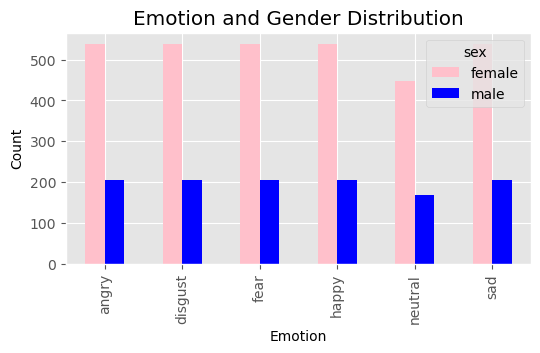

In [43]:
def plot_distribution(df): 
    countTable = df.groupby(['emotion', 'sex']).count()
    pivotTable = countTable.pivot_table(index='emotion', columns='sex', values='path')

    pivotTable.plot(kind='bar', figsize=(6, 3), color=['pink', 'blue'])
    plt.title('Emotion and Gender Distribution')
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()
    
plot_distribution(df)

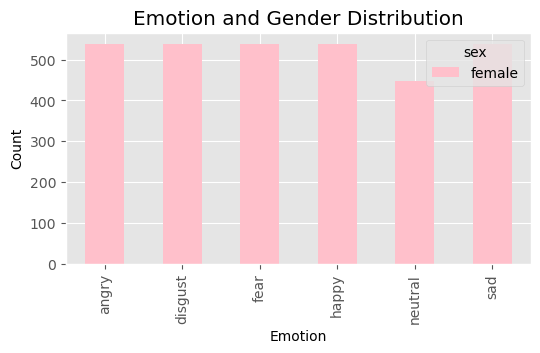

In [44]:
# I decided to go with a female specific model 
df = df[df['sex'] == 'female']
plot_distribution(df)

In [45]:
df.drop('sex', axis=1, inplace=True)
df.head()

,path,emotion
0,/Users/arushtripathi/Downloads/sentiment-predi...,angry
1,/Users/arushtripathi/Downloads/sentiment-predi...,fear
2,/Users/arushtripathi/Downloads/sentiment-predi...,fear
3,/Users/arushtripathi/Downloads/sentiment-predi...,angry
4,/Users/arushtripathi/Downloads/sentiment-predi...,disgust


In [46]:
from IPython.display import Audio

def create_waveplot(y, sr, title):
    plt.figure(figsize=(8, 2))
    plt.title(title)
    librosa.display.waveshow(y, sr=sr)
    plt.show()

AttributeError: module 'librosa' has no attribute 'display'

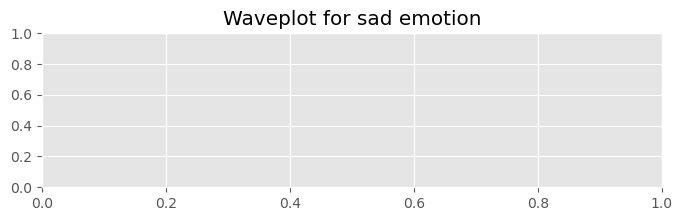

In [47]:
emotion_label = 'sad'
title = f"Waveplot for {emotion_label} emotion"
path = np.array(df.path[df.emotion == emotion_label])[1]
y, sr = librosa.load(path)

create_waveplot(y, sr, title)
Audio(path)

# 3. Preprocess

The following steps will be followed to preprocess the audio: 

1. Get an array of samples
2. Trim the silence  
3. Padding for equal length

In [48]:
from pydub import AudioSegment, effects

In [49]:
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)
    
    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    padded = np.pad(trimmed, (0, 180000-len(trimmed)), 'constant')
    return padded, sr

In [50]:
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2, 
    'angry'   : 3, 
    'fear'    : 4, 
    'disgust' : 5
}

def encode(label):
    return emotion_dic.get(label)

# 4. Extract features

We will only extract these features: 

1. Mel-Frequency Cepstral Coefficients: captures the shape of the spectral envelope of a signal
2. Zero Crossing Rate: captures the number of times a signal changes sign per second
3. Root Mean Square Energy: captures the root mean square amplitude of the audio signal

In [51]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in df.itertuples(index=False):
    try: 
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except:
        print(f"Failed for path: {row.path}")

Failed for path: /Users/arushtripathi/Downloads/sentiment-predictor-for-stress-detection-main/Audio_Speech_Actors_01-24/Actor_20/03-01-06-01-01-02-20.wav


In [52]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2), 
    np.swapaxes(rms_list, 1, 2), 
    np.swapaxes(mfccs_list, 1, 2)), 
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

In [54]:
X.shape

(3142, 352, 15)

In [55]:
y.shape

(3142, 1)

# 5. Build a LSTM

Before building the model, we will have to setup the data. LSTM are great for sequences.  

In [66]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Assuming you have your data X and y ready
# X.shape = (3142, 352, 15)
# y.shape = (3142, 1)

# Reshape X to match the expected input shape of the model
X_reshaped = X.reshape(X.shape[0], X.shape[1], X.shape[2])  # (3142, 352, 15)

# Splitting the data
X_train, X_val, y_train, y_val = train_test_split(X_reshaped, y, test_size=0.3, random_state=1)

y_train_class = to_categorical(y_train, num_classes=7)
y_val_class = to_categorical(y_val, num_classes=7)

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train_class, validation_data=(X_val, y_val_class),
                    epochs=200, batch_size=32, shuffle=True)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 123)               68388     
                                                                 
 dense_12 (Dense)            (None, 64)                7936      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 7)                 231       
                                                                 
Total params: 78635 (307.17 KB)
Trainable params: 7863

69/69 [==============================] - 10s 141ms/step - loss: 0.5995 - accuracy: 0.7808 - val_loss: 0.6478 - val_accuracy: 0.7656
Epoch 50/200
69/69 [==============================] - 9s 132ms/step - loss: 0.6085 - accuracy: 0.7890 - val_loss: 0.7666 - val_accuracy: 0.7253
Epoch 51/200
69/69 [==============================] - 9s 132ms/step - loss: 0.6419 - accuracy: 0.7744 - val_loss: 0.6048 - val_accuracy: 0.7900
Epoch 52/200
69/69 [==============================] - 9s 135ms/step - loss: 0.6063 - accuracy: 0.7808 - val_loss: 0.6114 - val_accuracy: 0.7678
Epoch 53/200
69/69 [==============================] - 9s 135ms/step - loss: 0.5809 - accuracy: 0.8004 - val_loss: 0.6759 - val_accuracy: 0.7699
Epoch 54/200
69/69 [==============================] - 9s 135ms/step - loss: 0.5661 - accuracy: 0.8063 - val_loss: 0.5700 - val_accuracy: 0.7964
Epoch 55/200
69/69 [==============================] - 9s 135ms/step - loss: 0.6019 - accuracy: 0.7831 - val_loss: 0.5912 - val_accuracy: 0.7741
Epoc

Epoch 106/200
69/69 [==============================] - 9s 132ms/step - loss: 0.4363 - accuracy: 0.8377 - val_loss: 0.4930 - val_accuracy: 0.8314
Epoch 107/200
69/69 [==============================] - 10s 141ms/step - loss: 0.4164 - accuracy: 0.8454 - val_loss: 0.5534 - val_accuracy: 0.7996
Epoch 108/200
69/69 [==============================] - 9s 134ms/step - loss: 0.4170 - accuracy: 0.8313 - val_loss: 0.4937 - val_accuracy: 0.8218
Epoch 109/200
69/69 [==============================] - 9s 135ms/step - loss: 0.4235 - accuracy: 0.8436 - val_loss: 0.5166 - val_accuracy: 0.8165
Epoch 110/200
69/69 [==============================] - 9s 137ms/step - loss: 0.3832 - accuracy: 0.8495 - val_loss: 0.6270 - val_accuracy: 0.7964
Epoch 111/200
69/69 [==============================] - 9s 135ms/step - loss: 0.4632 - accuracy: 0.8195 - val_loss: 0.4974 - val_accuracy: 0.8271
Epoch 112/200
69/69 [==============================] - 9s 133ms/step - loss: 0.4318 - accuracy: 0.8436 - val_loss: 0.5775 - val_a

69/69 [==============================] - 9s 131ms/step - loss: 0.3357 - accuracy: 0.8636 - val_loss: 0.5035 - val_accuracy: 0.8409
Epoch 163/200
69/69 [==============================] - 9s 132ms/step - loss: 0.3509 - accuracy: 0.8622 - val_loss: 0.5370 - val_accuracy: 0.8271
Epoch 164/200
69/69 [==============================] - 9s 130ms/step - loss: 0.3607 - accuracy: 0.8658 - val_loss: 0.4795 - val_accuracy: 0.8356
Epoch 165/200
69/69 [==============================] - 9s 137ms/step - loss: 0.3538 - accuracy: 0.8654 - val_loss: 0.4682 - val_accuracy: 0.8473
Epoch 166/200
69/69 [==============================] - 9s 129ms/step - loss: 0.3732 - accuracy: 0.8540 - val_loss: 0.5338 - val_accuracy: 0.8346
Epoch 167/200
69/69 [==============================] - 9s 132ms/step - loss: 0.3950 - accuracy: 0.8549 - val_loss: 0.5500 - val_accuracy: 0.8367
Epoch 168/200
69/69 [==============================] - 9s 132ms/step - loss: 0.3601 - accuracy: 0.8590 - val_loss: 0.5877 - val_accuracy: 0.8409

In [53]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.12, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_train_class = to_categorical(y_train, 6)
y_val_class = to_categorical(y_val, 6)

In [26]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [56]:
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(352,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 123)               61500     
                                                                 
 dense_6 (Dense)             (None, 64)                7936      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 7174

In [57]:
history=model.fit(X,y,validation_split=0.2,epochs=175,batch_size=512,shuffle=True)

Epoch 1/175


ValueError: in user code:

    File "/Users/arushtripathi/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/arushtripathi/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/arushtripathi/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/arushtripathi/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "/Users/arushtripathi/anaconda3/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/arushtripathi/anaconda3/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "lstm_2" is incompatible with the layer: expected shape=(None, None, 1), found shape=(None, 352, 15)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 352, 15), dtype=float32)
      • training=True
      • mask=None


# 6. Evaluate and conclude

Let's see how good are model is. 

In [59]:
from sklearn.metrics import confusion_matrix

TypeError: 'History' object is not subscriptable

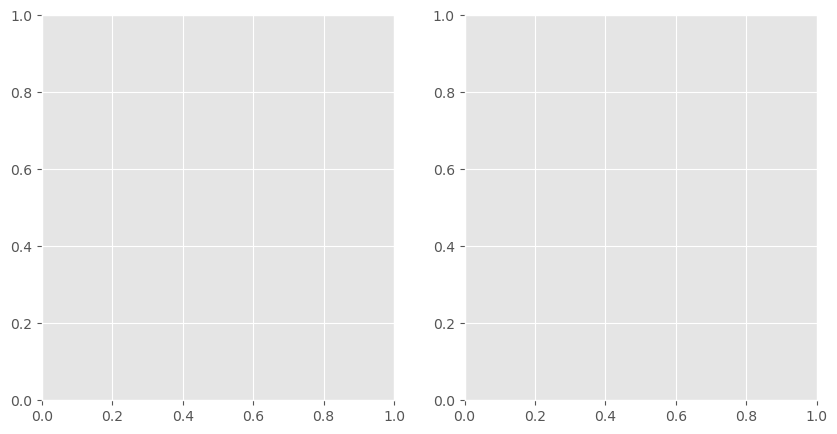

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(model.history['loss'])
axes[0].plot(model.history['val_loss'])
axes[0].set_title('Loss for Train and Validation Sets')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epochs')
axes[0].legend(['Training', 'Validation'])

axes[1].plot(model.history['categorical_accuracy'])
axes[1].plot(model.history['val_categorical_accuracy'])
axes[1].set_title('Accuracy for Train and Validation Sets')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].legend(['Training', 'Validation'])

fig.tight_layout()

plt.show()

30/30 [==============================] - 1s 36ms/step


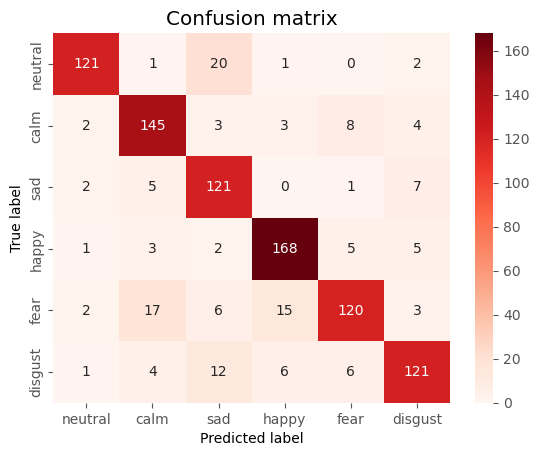

In [69]:
import seaborn as sns

y_pred = np.argmax(model.predict(X_val), axis=1)
labels = ['neutral', 'calm', 'sad', 'happy', 'fear', 'disgust']
cm = confusion_matrix(np.argmax(y_val_class, axis=1), y_pred, labels=range(6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

**Conclusion**

In summary, our model achieved 92% accuracy in classifying six different emotions. However, there are several ways we could improve it. For example, we could change the model, obtain a better dataset and extract different features. One optimization that we could make is to generate a codebook and apply vector quantization to reduce the dimensionality. This can help to improve the model's training speed and reduce the risk of overfitting. Lastly, don't forget to use accelerators to speed up the training process. 

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_train_class,y_val_class,target_names=class_names,digits=4))

NameError: name 'class_names' is not defined

In [70]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# ... (Rest of the code)

# Calculate precision, recall, and F1 score
precision = precision_score(np.argmax(y_val_class, axis=1), y_pred, average='macro')
recall = recall_score(np.argmax(y_val_class, axis=1), y_pred, average='macro')
f1 = f1_score(np.argmax(y_val_class, axis=1), y_pred, average='macro')

print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1 Score: {f1:.4f}")


Macro Precision: 0.8473
Macro Recall: 0.8431
Macro F1 Score: 0.8425


In [71]:
precision = precision_score(np.argmax(y_val_class, axis=1), y_pred, average='weighted')
recall = recall_score(np.argmax(y_val_class, axis=1), y_pred, average='weighted')
f1 = f1_score(np.argmax(y_val_class, axis=1), y_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1 Score: {f1:.4f}")


Weighted Precision: 0.8492
Weighted Recall: 0.8441
Weighted F1 Score: 0.8440
